
# <b>Unsupervised Learning-Clustering Models
Pablo Aguirre Solana

## **Objective**

### <font color ='red'>**Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.</font>

## Importing libraries and overview of the dataset

In [2]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


#if the below line of code gives an error, then uncomment the following code to install the sklearn_extra library
#!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [3]:
data = pd.read_excel('Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

**There are no missing values. Let us now figure out the uniques in each column.** 

In [5]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values. We should treat the same accordingly before applying any algorithm.

## Data Preprocessing and Exploratory Data Analysis

In [6]:
data.shape

(660, 7)

In [9]:
# Identify the duplicated customer keys
duplicate_keys = data.loc[data['Customer Key'].duplicated(), :]
print(duplicate_keys)

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
332    333         47437             17000                   7   
398    399         96929             67000                   6   
432    433         37252             59000                   6   
541    542         50706             60000                   7   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
332                  3                    1                 0  
398                  2                    2                 2  
432                  2                    1                 2  
541                  5                    2                 2  
632                  1                    7                 0  


In [7]:
# Drop duplicated keys

data = data.drop([data.index[332], data.index[398],data.index[432],data.index[541],data.index[632]])

In [8]:
data.shape

(655, 7)

We have done some basic checks. Now, let's drop the variables that are not required for our analysis.

In [9]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

Now that we have dropped unnecessary column. We can again check for duplicates. Duplicates would mean customers with identical features.

In [10]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


We can drop these duplicated rows from the data

In [11]:
data=data[~data.duplicated()]

In [12]:
data.shape

(644, 5)

- After removing duplicated keys and rows and unnecessary columns, there are 644 unique observations and 5 columns in our data.

#### Summary Statistics

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:   
From a simple glance at this descriptives, I could assume that the Average Credit Limit has a skewed distribution. That is; there is a large proportion of customers that have a credit limit between 3,000 and around 50,000, and a small proportion of customers that have a credit limit bigger than the last. Also it appears that the larger the credit limit, the more calls are made, and the more the number of credit cards a customer has.**

#### Distribution and outliers for each variable in the data.

Avg_Credit_Limit
Skew : 2.19


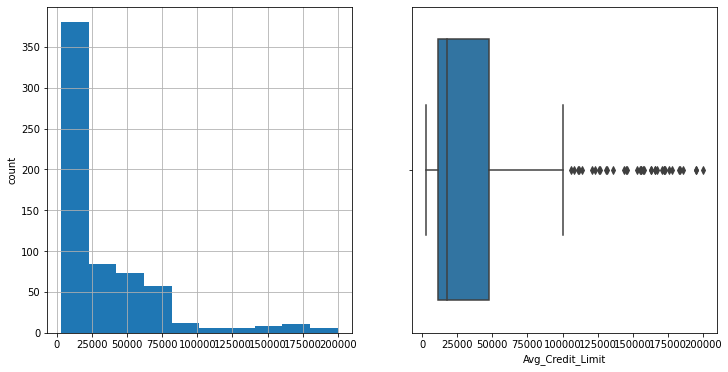

Total_Credit_Cards
Skew : 0.17


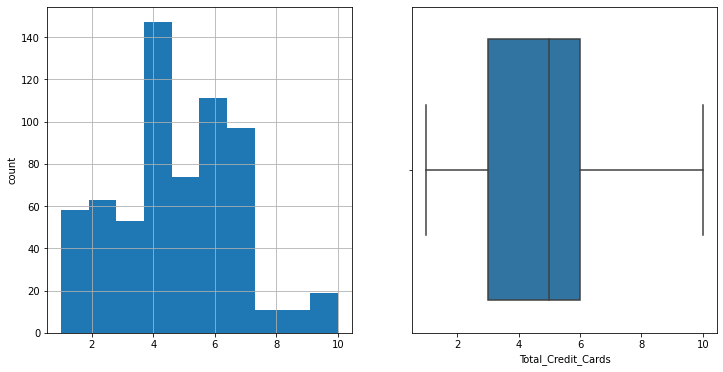

Total_visits_bank
Skew : 0.15


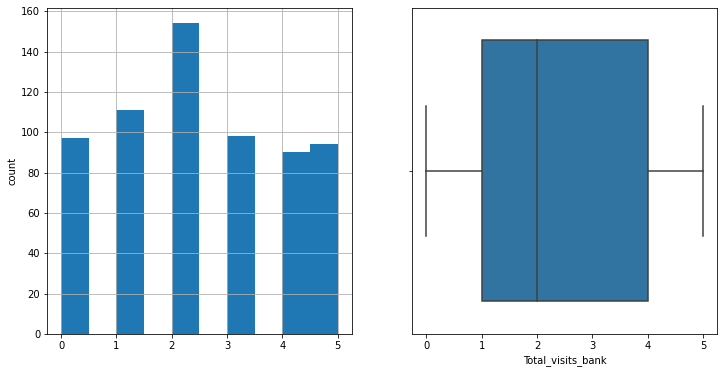

Total_visits_online
Skew : 2.21


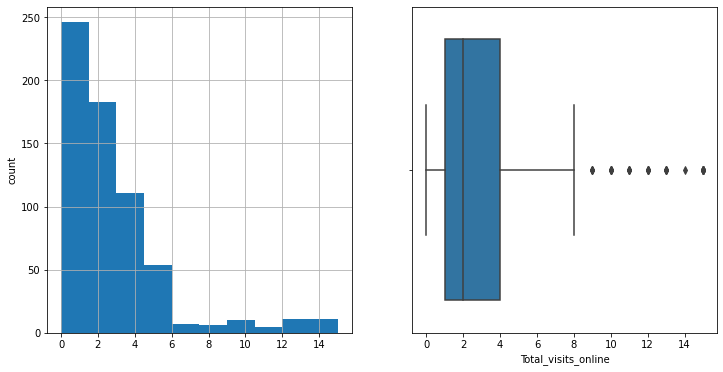

Total_calls_made
Skew : 0.65


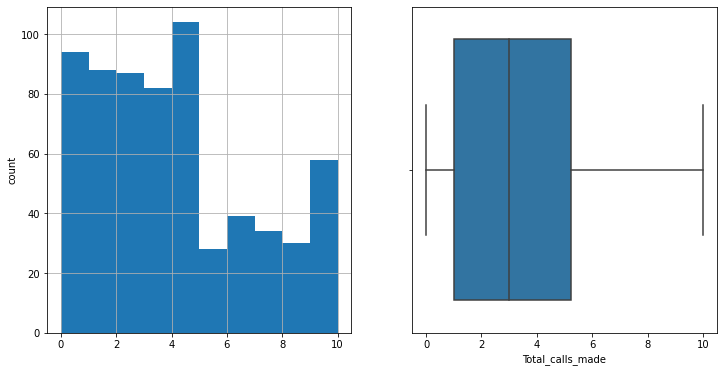

In [14]:


for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(12,6))
     plt.subplot(1,2,1)
     data[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=data[col])
     plt.show()

**Observation:
From the distribution of the histogram, and their skewness we can confirm that the Average Credit Limit and Total Visits are the most skewed variables in the data set, also the ones that have more outliers, and follow a very similar distribution pattern, that can be explained by the correlation in the below chart betweenn this two variables.**

**Correlation among different variables.**

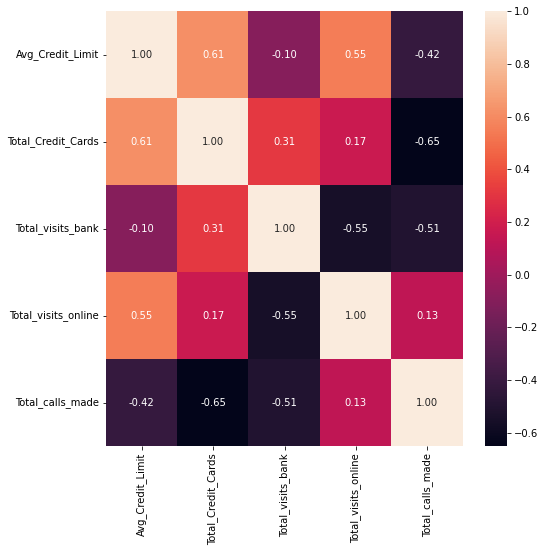

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

#### Scaling the data

In [16]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [17]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


In [18]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and find the elbow

**SSE = Sum of squared errors

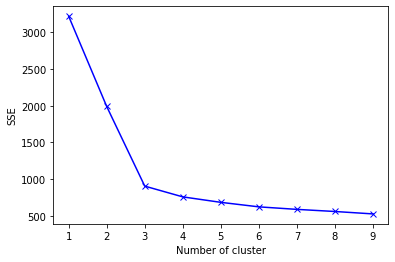

In [19]:
sse = {} 

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

In [20]:
#Fitting the model
means = KMeans(n_clusters=3, max_iter=1000, random_state=1) 
kmeans.fit(data_scaled) 

KMeans(max_iter=1000, n_clusters=3, random_state=1)

In [21]:
data_scaled_copy['Labels'] = kmeans.predict(data_scaled_copy) 
a = data_scaled_copy['Labels']
data = pd.concat([a, data.reindex(a.index)],axis = 1)  

We have generated the labels with k-means. 

#### **Cluster profiles**

In [22]:
#Number of observations in each cluster
data.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [23]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12293.577982,33187.845304,109270.833333,12000.0,30000.0,107000.0
Total_Credit_Cards,2.422018,5.461326,7.708333,2.0,6.0,8.0
Total_visits_bank,0.949541,3.469613,1.437500,1.0,3.0,1.0
Total_visits_online,3.568807,0.988950,7.854167,4.0,1.0,8.5
Total_calls_made,6.885321,2.069061,1.208333,7.0,2.0,1.0


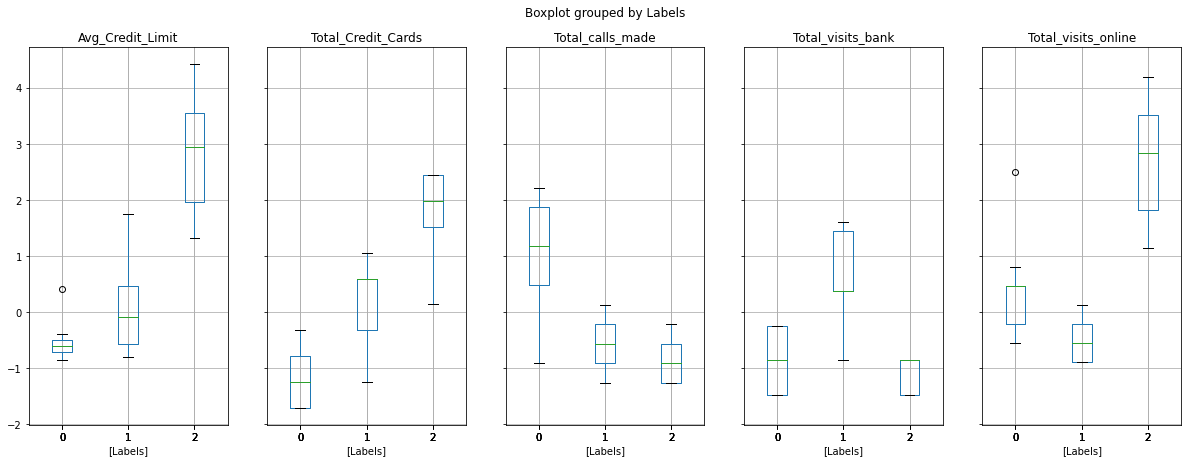

In [25]:
#Visualizing different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:  Cluster 0; represents around a third of the sample (34%).  This cluster, has the lowest Average Credit Limit, the lowest amount of cards, and the highest number total of calls made. 
Cluster 1; represents the largest proportion of the sample (58%). The particularity of this cluster is that it has the highest total visits made to the bank.
Cluster 2; represents the smallest of the sample (7%), and also the wealthiest. With the highest Average Credit Limit, and the highest amount of cards, and the highest number of total visits on line. 
It is very clear that the service channels for these groups can be the variable than most differentiate them, besides Credit Limit and Number of cards.**

## Gaussian Mixture Model

In [26]:
gmm = GaussianMixture(n_components=3, random_state=1) 
gmm.fit(data_scaled) 

GaussianMixture(n_components=3, random_state=1)

In [27]:
data_scaled_copy.drop(columns = ['Labels'], inplace = True)
data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled_copy)
b = data_scaled_copy['GmmLabels']
data = pd.concat([b, data.reindex(a.index)],axis = 1)   

In [28]:
#Number of observations in each cluster
data.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

In [29]:
#Calculating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12293.577982,33187.845304,109270.833333,12000.0,30000.0,107000.0
Total_Credit_Cards,2.422018,5.461326,7.708333,2.0,6.0,8.0
Total_visits_bank,0.949541,3.469613,1.437500,1.0,3.0,1.0
Total_visits_online,3.568807,0.988950,7.854167,4.0,1.0,8.5
Total_calls_made,6.885321,2.069061,1.208333,7.0,2.0,1.0


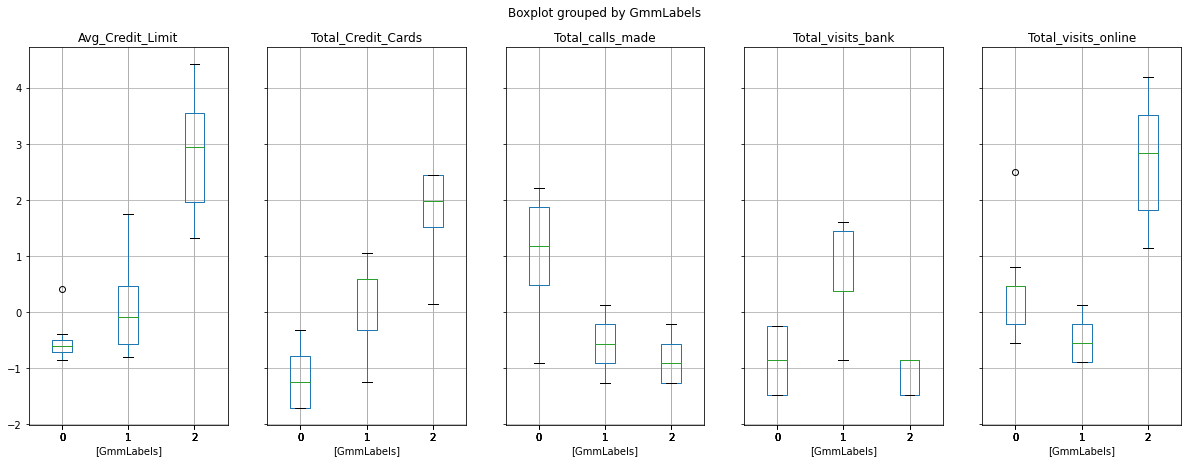

In [30]:
# plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:Cluster 0; represents around a third of the sample (34%).  This cluster, has the lowest Average Credit Limit, the lowest amount of cards, and the highest number total of calls made. 
Cluster 1; represents the largest proportion of the sample (58%). The particularity of this cluster is that it has the highest total visits made to the bank.
Cluster 2; represents the smallest of the sample (7%), and also the wealthiest. With the highest Average Credit Limit, and the highest amount of cards, and the highest number of total visits on line. 
It is very clear that the service channels for these groups can be the variable than most differentiate them beside Credit Limit and Number of cards.**

**Comparing Clusters: There is no significant and conclusive evidence that K-Means and Gaussian model yield different results, on the contrary, they yield the same results.**

## K-Medoids

In [32]:
kmedo = KMedoids(n_clusters=3, random_state=1) 
kmedo.fit(data_scaled) 

KMedoids(n_clusters=3, random_state=1)

In [33]:
data_scaled_copy.drop(columns = ['GmmLabels'], inplace = True)
data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled_copy)
c = data_scaled_copy['kmedoLabels']
data = pd.concat([c, data.reindex(c.index)],axis = 1)    

In [35]:
#Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [36]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12287.671233,68937.984496,29839.285714,12000.0,55000.0,19000.0
Total_Credit_Cards,2.433790,6.248062,5.485714,2.0,6.0,6.0
Total_visits_bank,0.968037,2.689922,3.475000,1.0,3.0,3.0
Total_visits_online,3.561644,3.496124,1.007143,4.0,1.0,1.0
Total_calls_made,6.872146,1.837209,2.021429,7.0,2.0,2.0


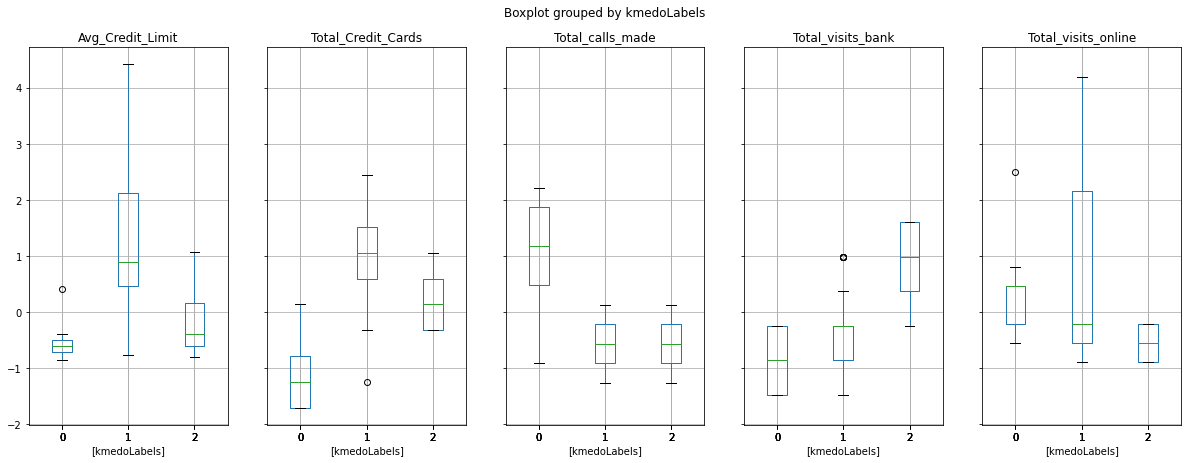

In [37]:
#plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit",	"Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1,5),figsize=(20,7))
plt.show()

Let's compare the clusters from K-Means and K-Medoids 

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Cluster 0; with this new model stills represents around a third of the sample (34%).  This cluster, has the lowest Average Credit Limit, the lowest amount of cards, and the highest number total of calls made. 
Cluster 1; has dropped from (58%) to (21%) now this group has the highest credit limit, the highest amount of cards and the highest numbers of total visits on line. 
Cluster 2; now from the (7%) of the sample, represents almost half (45% with the highest total visits to the bank. 
**

**It is likely that; with this new segmentation (K-Medoids), people from group 1 and 2 were distributed more evenly, and corrected due to the fact that K means is sensitive to outliers. As we saw in the Box Plots, the variables (Average Credit Limit and Visits on Line) presented outliers and this could be the reason why the first and second models had two large groups and a very small one (group 2 size (7%). K-means attempts to minimize the total squared error, while k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k-means algorithm, k-medoids chooses datapoints as centers. It could be more robust to noise and outliers as compared to k-means because it minimizes a sum of general pairwise dissimilarities instead of a sum of squared Euclidean distances. **